In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data = pd.read_csv('train.csv', index_col="Date", parse_dates=["Date"])
data.drop(["DayOfWeek", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday"], inplace=True, axis=1)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Store = 67

data_store = data[data.Store == Store]["Sales"]
data_store_week = data_store.resample("W").sum()

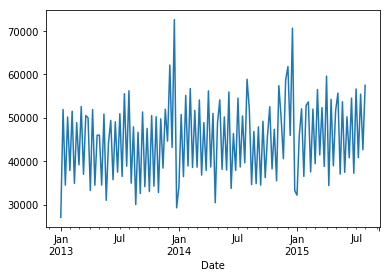

In [5]:
data_store_week.plot()

In [6]:
train, test = train_test_split(data_store_week, shuffle=False)

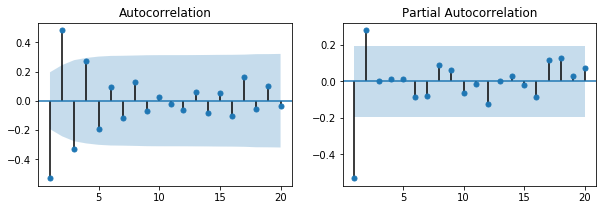

In [7]:
plt.figure(figsize=(10,3))

ax = plt.subplot(1,2,1)
_ = sm.graphics.tsa.plot_acf(train, ax=ax, zero=False, lags=20)

ax = plt.subplot(1,2,2)
_ = sm.graphics.tsa.plot_pacf(train, ax=ax, zero=False, lags=20)

In [8]:
model = sm.tsa.ARIMA(train.astype(np.float64), order=(2,0,0)).fit()

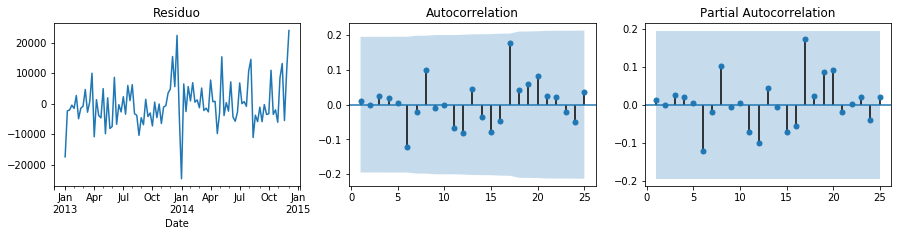

In [9]:
plt.figure(figsize=(15,3))

plt.subplot(131)
model.resid.plot()
plt.title("Residuo")

ax = plt.subplot(132)
_ = sm.graphics.tsa.plot_acf(model.resid, ax=ax, zero=False, lags=25)

ax = plt.subplot(133)
_ = sm.graphics.tsa.plot_pacf(model.resid, ax=ax, zero=False, lags=25)

In [10]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 2099.6422 
Dependent Variable: Sales            Log-Likelihood:      -1040.6   
Date:               2018-06-02 17:47 Scale:               1.0000    
No. Observations:   101              Method:              css-mle   
Df Model:           3                Sample:              01-06-2013
Df Residuals:       98                                    12-07-2014
Converged:          1.0000           S.D. of innovations: 7195.607  
AIC:                2089.1817        HQIC:                2093.416  
--------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const       44462.6934 646.8659 68.7356 0.0000 43194.8595 45730.5273
ar.L1.Sales    -0.3961   0.1027 -3.8568 0.0002    -0.5973    -0.1948
ar.L2.Sales     0.2900   0.1042  2.7817 0.0065     0.0857     0.4943
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.2957             0.0000           1.2957             0.5000
AR.2            2.6615             0.0000           2.6615             0.0000
====================================================================

"""

## Avaliação

In [11]:
from sklearn.metrics import mean_squared_error

In [107]:
model_test = sm.tsa.ARIMA(test[:-4].astype(np.float64), order=(2, 0, 0)).fit()

In [108]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [109]:
y_hat = model_test.predict()
y = test[:-4]

In [110]:
mape(y_true=y, y_pred=y_hat)

12.354556870264203

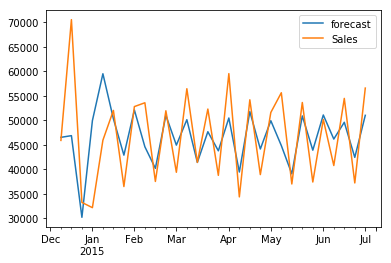

In [111]:
_ = model_test.plot_predict()